# Mô hình Random Forest cho bài toán phân loại khách hàng mua bảo hiểm

 - Trong bài thực hành này, chúng ta sử dụng mô hình Random Forest để phân loại khách hàng mua bảo hiểm. Mô hình sau khi huấn luyện được sử dụng để xem khách hàng mua bảo hiểm là 'Good' hay 'Bad'

* Import các thư viện:

In [1]:
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline


np.set_printoptions(formatter={'float_kind':'{:f}'.format})


sns.set(rc={'figure.figsize':(8,6)})

from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# Mô tả dữ liệu
* Trong tập dữ liệu này được cung cấp hơn một trăm biến mô tả đặc điểm của người đăng ký bảo hiểm nhân thọ. Nhiệm vụ là dự đoán biến 'Response'(phản hồi) cho từng Id trong bộ kiểm tra. 'Response' là thước đo rủi ro  chia ra 8 cấp độ trong đó 8 là cấp độ tốt nhất

* Id: Mã định danh duy nhất được liên kết với một ứng dụng.

* Product_Info_1-7: Một tập hợp các biến chuẩn hóa liên quan đến sản phẩm được áp dụng cho

* Ins_Age: Độ tuổi bình thường của người nộp đơn

* Ht: Chiều cao chuẩn hóa của người nộp đơn

* Wt: Cân nặng chuẩn hóa của người nộp đơn

* BMI: BMI chuẩn hóa của người nộp đơn

* Employment_Info_1-6: Một tập hợp các biến chuẩn hóa liên quan đến lịch sử việc làm của người nộp đơn

* InsuredInfo_1-6: Một tập hợp các biến chuẩn hóa cung cấp thông tin về người nộp đơn.

* Insurance_History_1-9: Một tập hợp các biến chuẩn hóa liên quan đến lịch sử bảo hiểm của người nộp đơn. 

* Family_Hist_1-5: Một tập hợp các biến chuẩn hóa liên quan đến lịch sử gia đình của người nộp đơn.

* Medical_History_1-41: Một tập hợp các biến được chuẩn hóa liên quan đến lịch sử y tế của người nộp đơn.

* Medical_Keyword_1-48: Một tập hợp các biến giả liên quan đến sự hiện diện/không có từ khóa y tế được liên kết với ứng dụng.

* Response: Đây là biến mục tiêu, biến thứ tự liên quan đến quyết định cuối cùng liên quan đến một ứng dụng

# Load dữ liệu từ file

Đọc dữ liệu vào pandas dataframe

In [2]:
my_data = pd.read_csv("train.csv")
my_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


Kích thước của dữ liệu

In [3]:
my_data.shape

(59381, 128)

# 3. Tiền xử lý dữ liệu

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [5]:
my_data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


# 3.1 Xử lý dữ liệu thiếu và không quan trong 

In [6]:
my_data.sample(5)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
36463,48434,1,D1,26,0.076923,2,3,1,0.507463,0.781818,...,0,0,0,0,0,0,1,0,0,6
7440,9919,1,D2,26,0.230769,2,3,1,0.701493,0.872727,...,0,1,0,1,0,0,0,1,0,8
39143,51971,1,D3,26,0.230769,2,3,1,0.268657,0.745455,...,0,0,0,0,0,0,0,0,0,5
59281,79019,1,D1,26,0.487179,2,1,3,0.268657,0.763636,...,0,0,0,0,0,0,0,0,0,2
58033,77339,1,A1,26,0.230769,2,3,1,0.149254,0.745455,...,0,0,0,0,0,0,0,0,0,8


Tìm cột chứa dữ liệu Object, xem đó có phải là dữ liệu quan trọng hay không. Nếu có thì chuyển dữ liệu về số thức, không quan trong thì xóa cột dữ liệu đó đi

In [7]:
object_columns = my_data.select_dtypes(include='object').columns
my_data[list(object_columns)]

,Product_Info_2
0,D3
1,A1
2,E1
3,D4
4,D2
...,...
59376,D1
59377,D3
59378,E1
59379,D2


Cột Product_Info_2 là cột chứa dữ liệu Object. Cột dữ liệu đó không quan trọng nên ta sẽ xóa cột.


In [8]:
my_data.drop('Product_Info_2',axis=1,inplace=True)

In ra % giá trị thiếu ở trong mỗi cột

In [9]:
missing_val_count_by_column = my_data.isnull().sum()/len(my_data)
print(missing_val_count_by_column[missing_val_count_by_column > 0.5].sort_values(ascending=False))

Medical_History_10    0.990620
Medical_History_32    0.981358
Medical_History_24    0.935990
Medical_History_15    0.751015
Family_Hist_5         0.704114
Family_Hist_3         0.576632
dtype: float64


In [10]:
# Xóa tất cả những cột thiếu dữ lớn hơn 50%
my_data = my_data.dropna(thresh=my_data.shape[0]*0.5,how='all',axis=1)

In [11]:
my_data.head()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
2,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
3,7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
4,8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


Kiểm tra lại kết quả

In [12]:
missing_val_count_by_column = my_data.isnull().sum()/len(my_data)
print(missing_val_count_by_column[missing_val_count_by_column > 0.5].sort_values(ascending=False))

Series([], dtype: float64)


In [13]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 121 entries, Id to Response
dtypes: float64(12), int64(109)
memory usage: 54.8 MB


Những cột bị thiếu dữ liệu còn lại ta thay thế những ô dữ liệu đó bằng giá trị mean.


In [14]:
my_data.fillna(my_data.mean(), inplace=True)

Do khi trả về kết quả t chỉ cần phân biệt khách hàng đó là 'Good' hay 'Bad' nên ta sẽ sử lý 'Response' về 2 kết quả duy nhất và mã hóa cho chúng: 'Good' = 1; 'Bad' = 0.

In [15]:
my_data['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

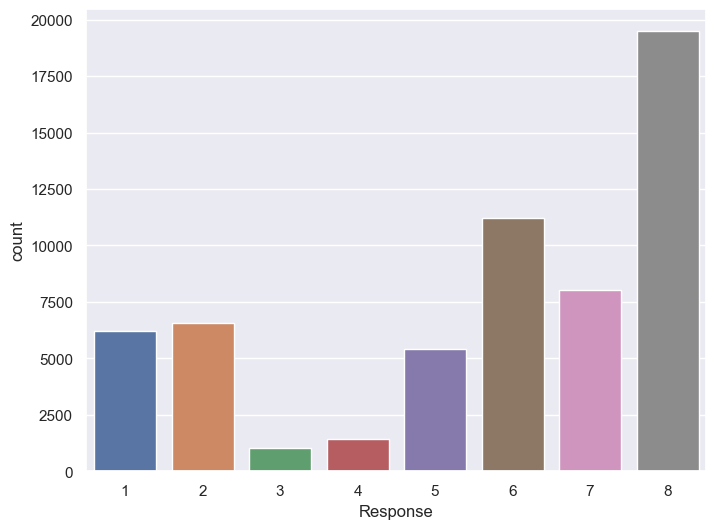

In [16]:
sns.countplot(x=my_data['Response'])

Những khách hàng được cấp độ 8 ta cho mã hóa 'Response' là 1, còn lại mã hóa thành 0. Đề phòng trường hợp 'Response' bị thiếu dữ liệu ở dòng nào đó ta cho dữ liệu thiếu thành -1.

In [17]:
my_data['Modified_Response']  = my_data['Response'].apply(lambda x : 0 if x<=7 and x>=0 else (1 if x==8 else -1))

<AxesSubplot:xlabel='Modified_Response', ylabel='count'>

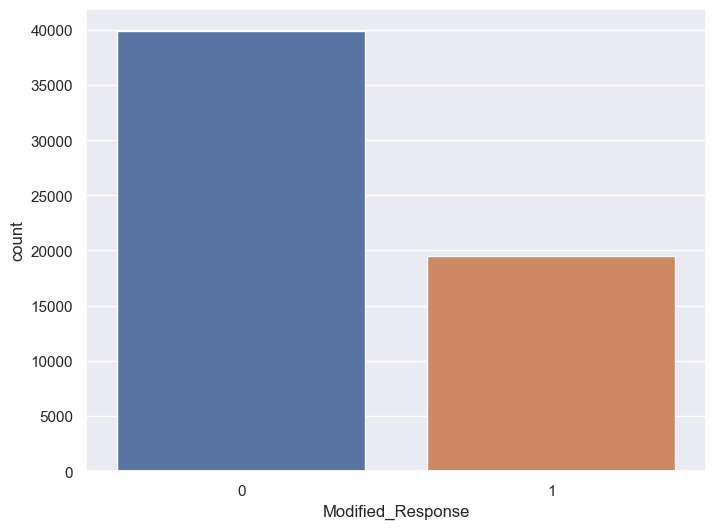

In [18]:
sns.countplot(x= my_data['Modified_Response'])

Xóa những dữ liệu cũ sau khi chuyển

In [19]:
my_data.drop('Response',axis = 1, inplace=True)

In [20]:
my_data.head()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Modified_Response
0,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,1
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
2,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,1
3,7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,1
4,8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,1


# Trực quan hóa từng cột và toàn bộ dữ liệu

Toàn bộ sự tương quan dữ liệu

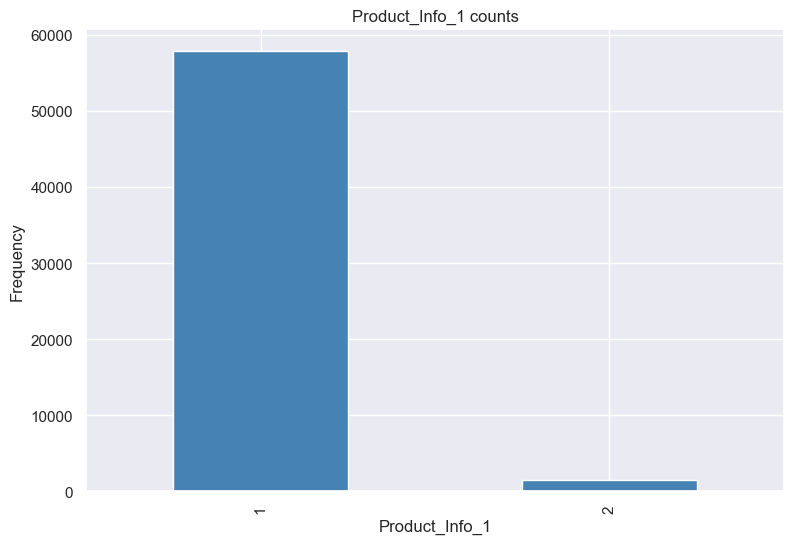

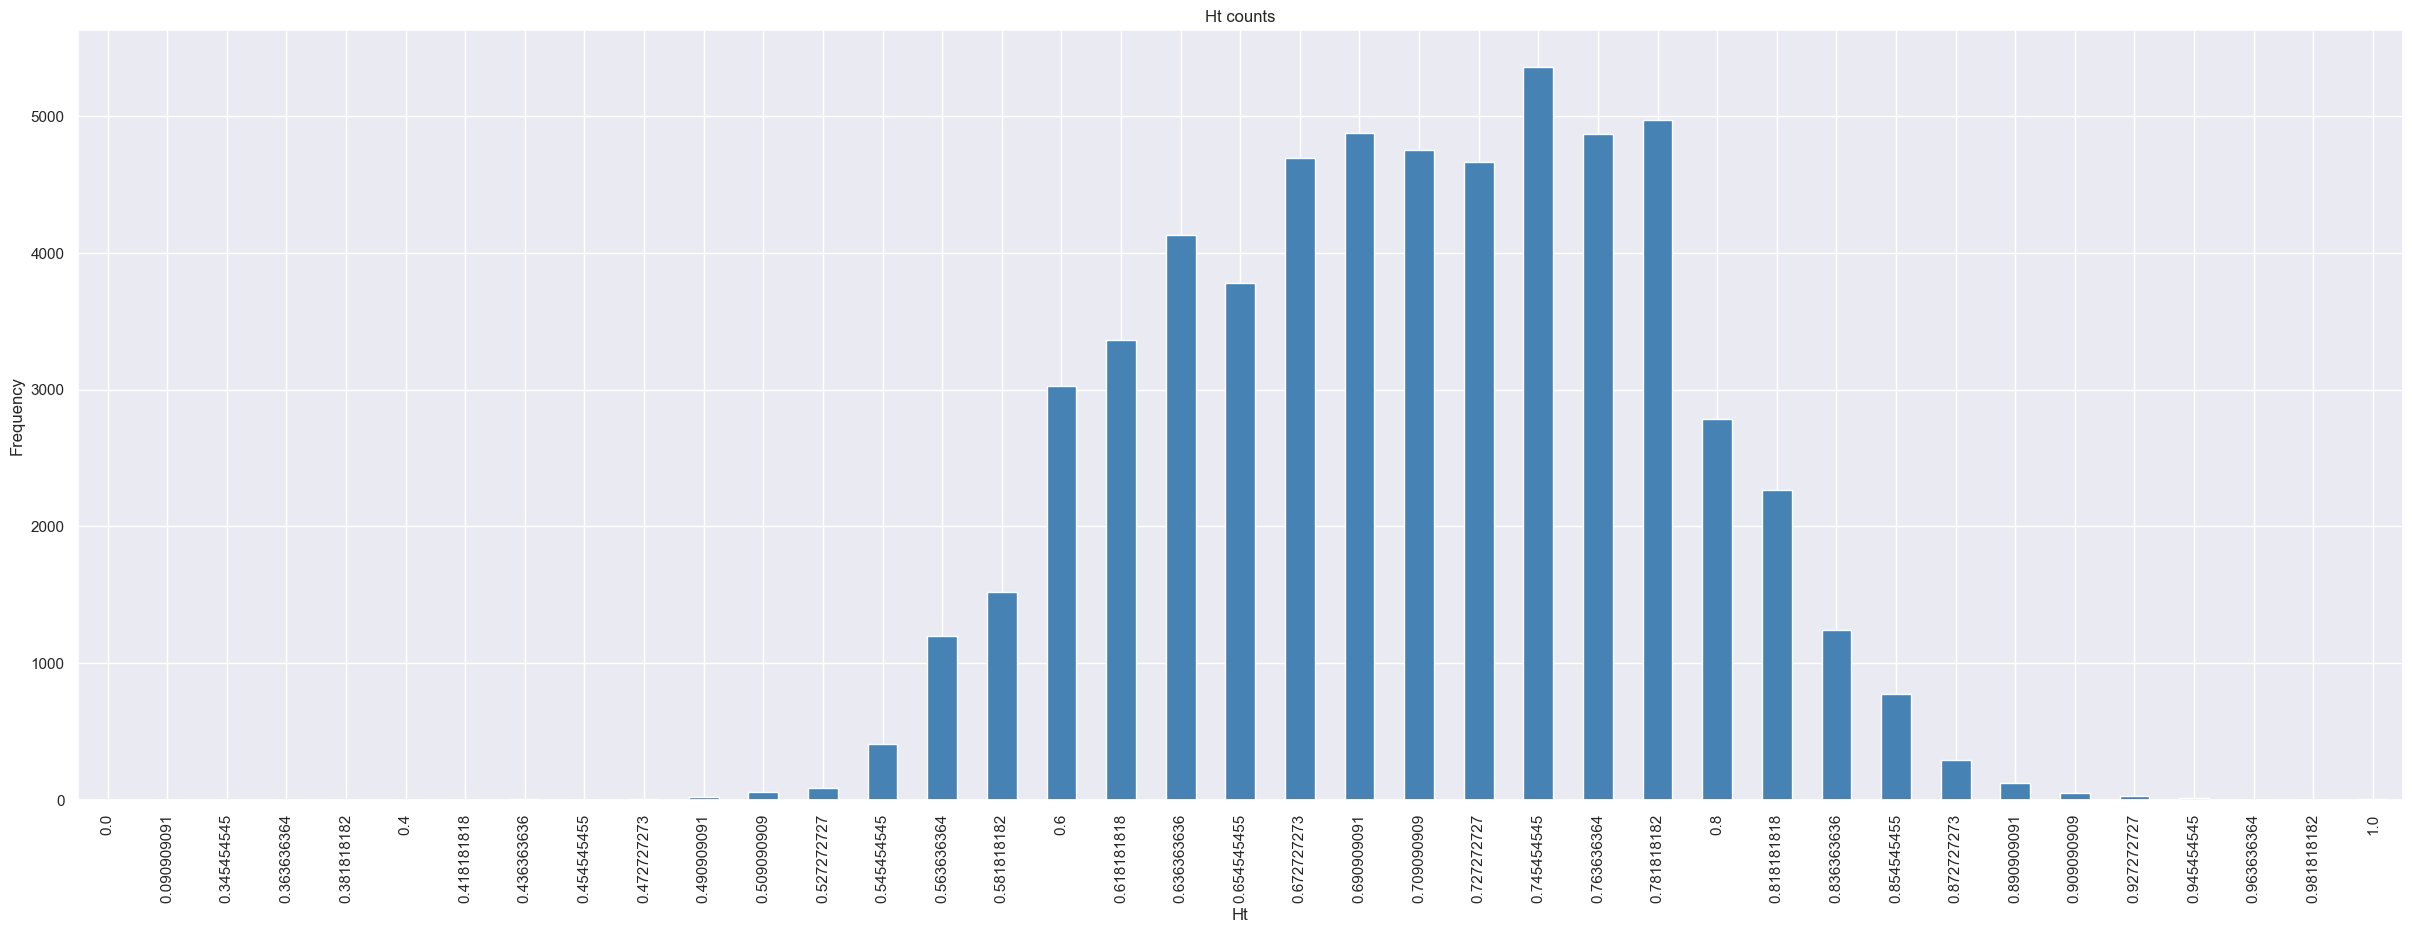

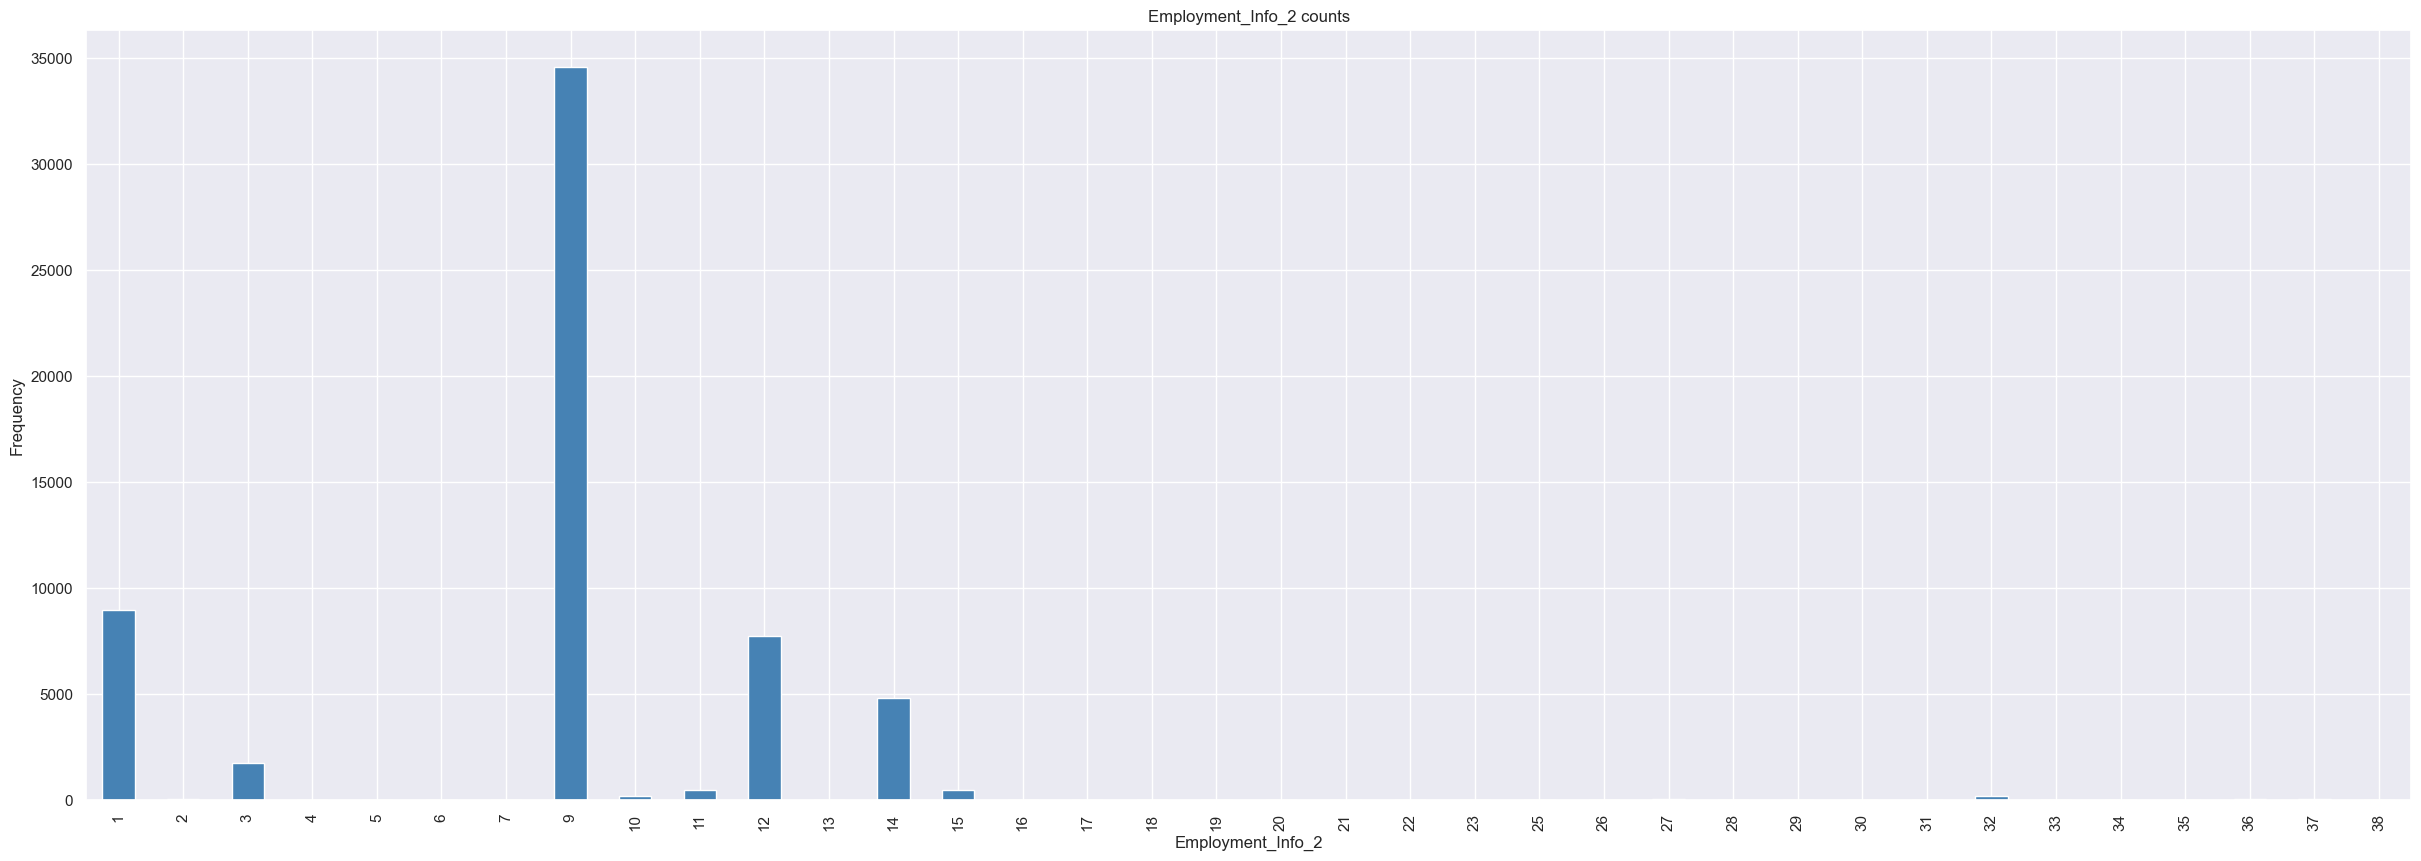

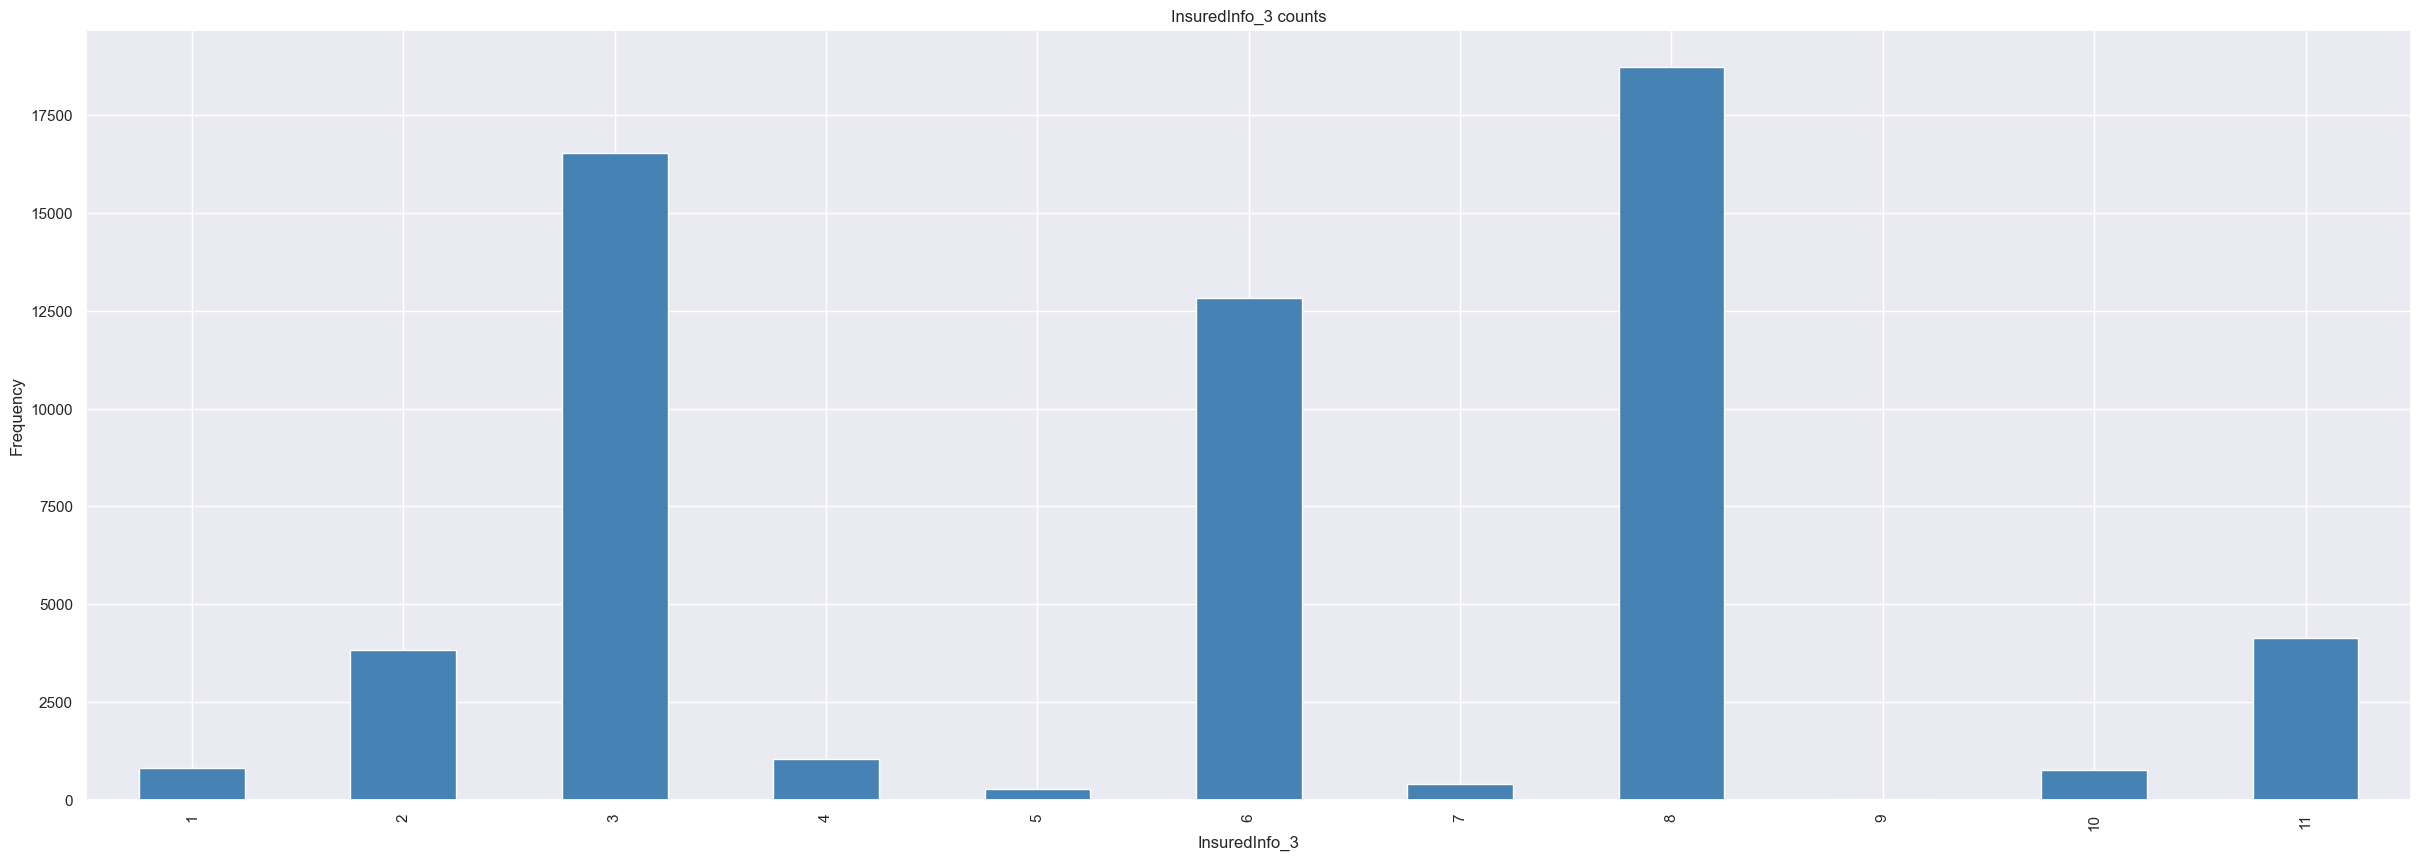

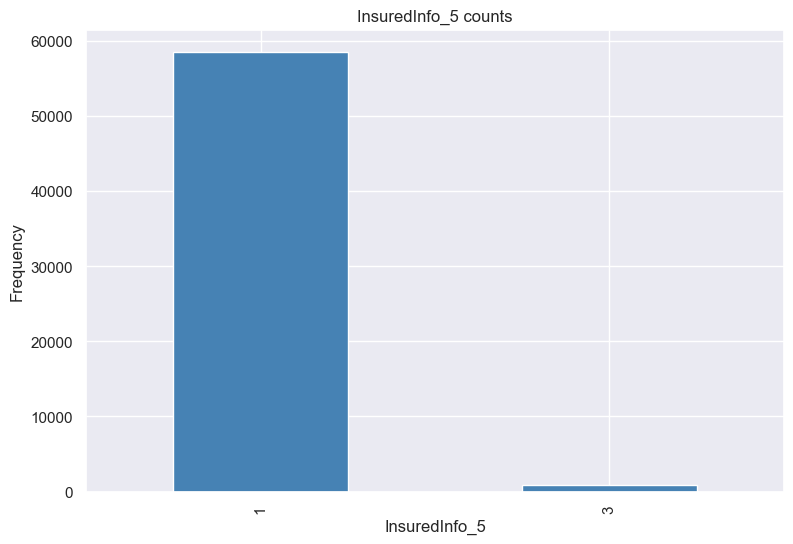

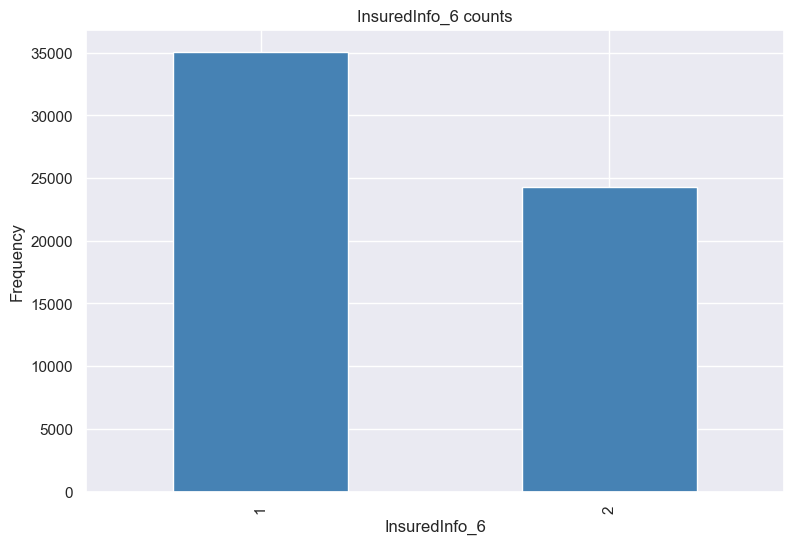

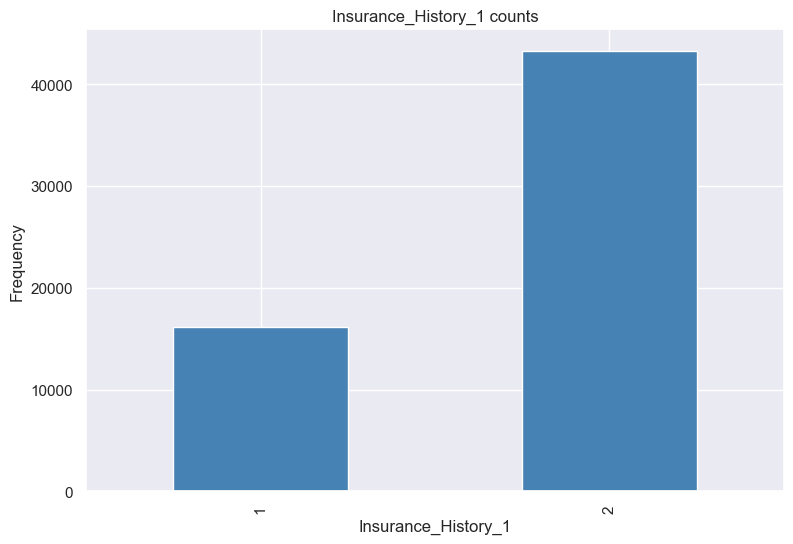

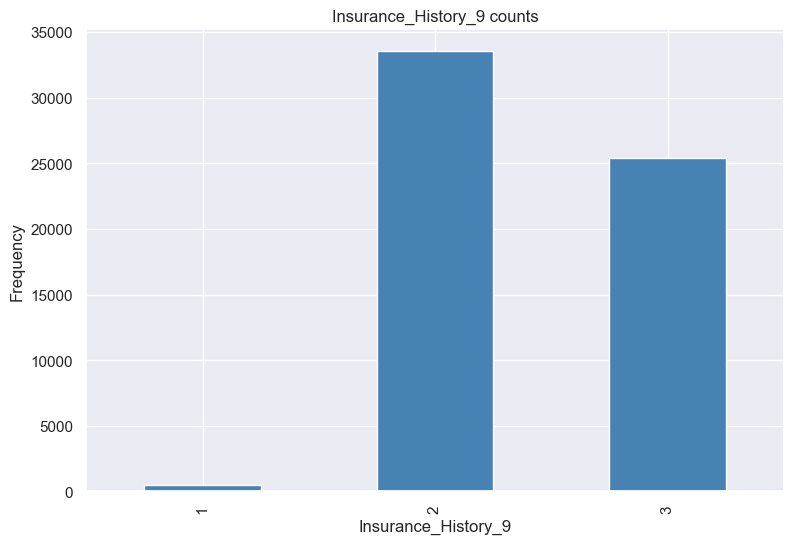

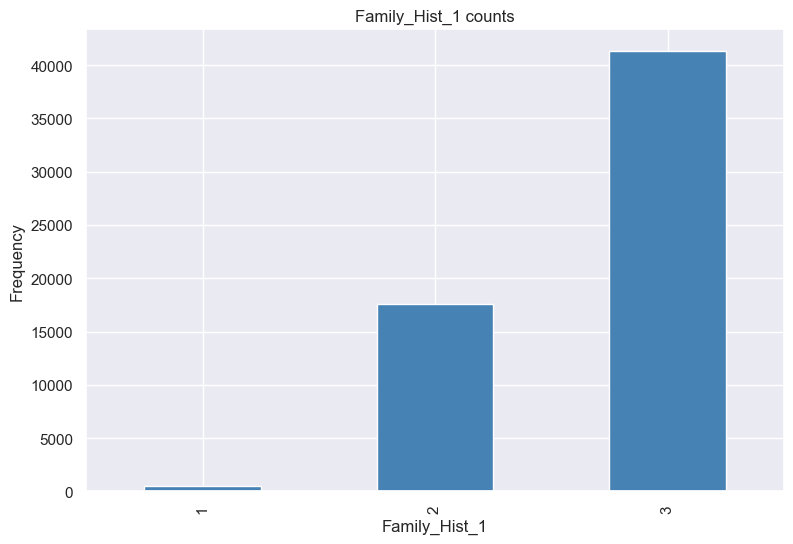

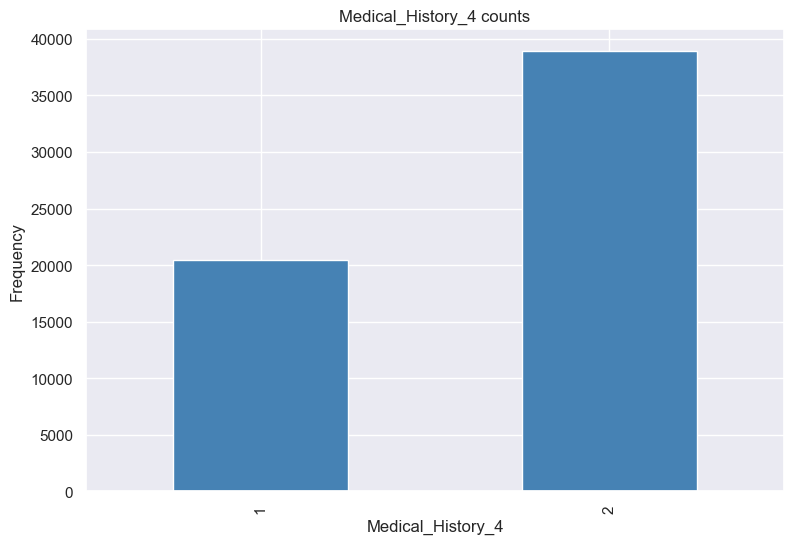

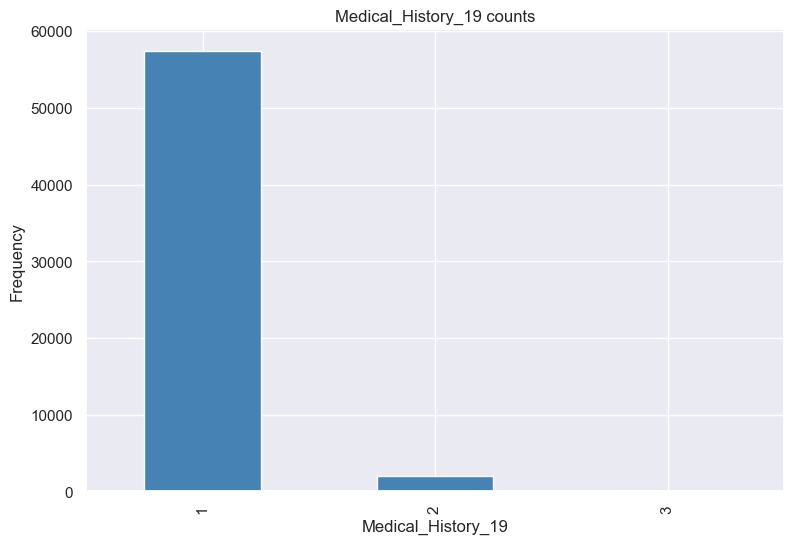

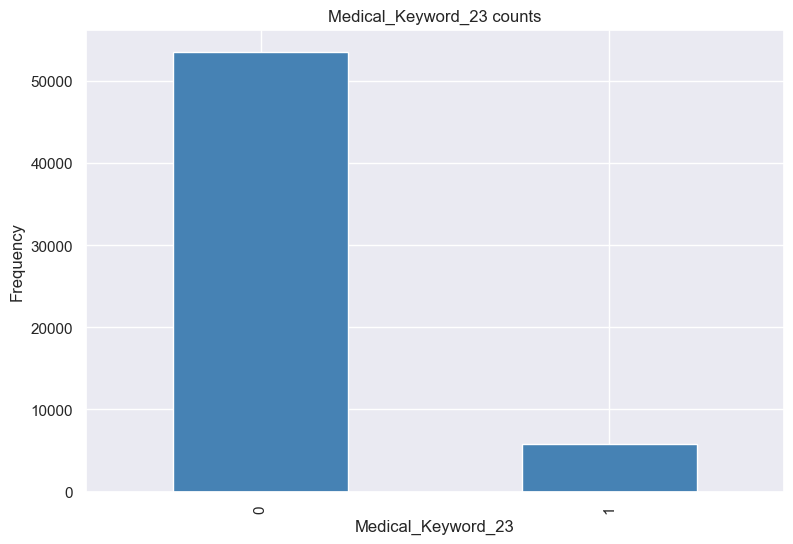

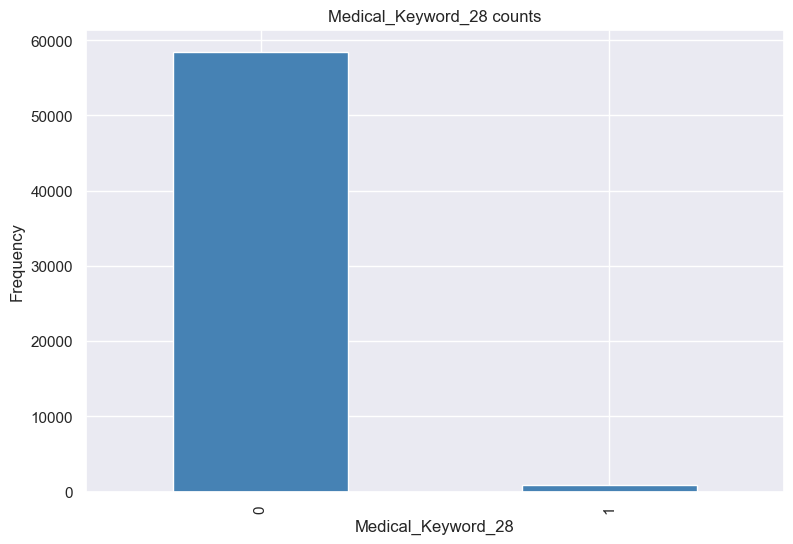

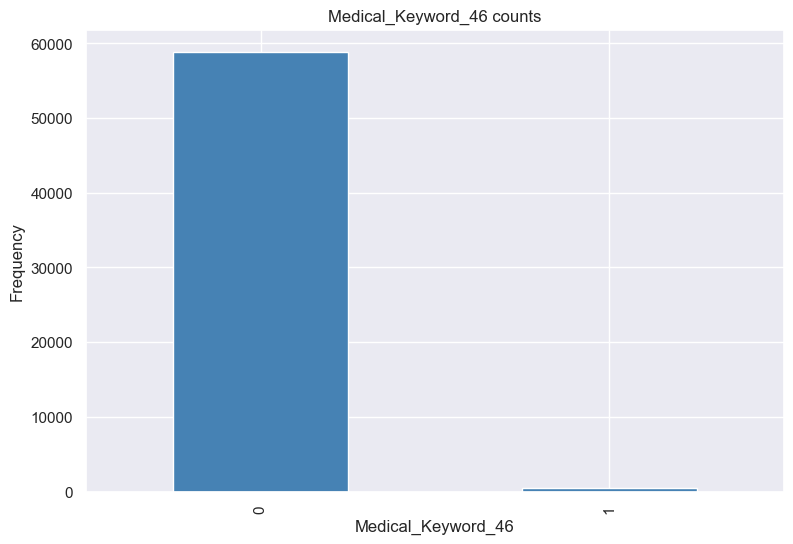

In [26]:
features = ['Product_Info_1','Product_Info_4','Ins_Age','Ht','Wt','BMI','Employment_Info_2','Employment_Info_6','InsuredInfo_3','InsuredInfo_5','InsuredInfo_6','Insurance_History_1','Insurance_History_5','Insurance_History_9','Family_Hist_2','Family_Hist_4','Family_Hist_1','Medical_History_2','Medical_History_4','Medical_History_19','Medical_Keyword_23','Medical_Keyword_28','Medical_Keyword_46']
# Doing count plots for categorical
for col in features:
    counts = my_data[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
      fig = plt.figure(figsize=(30, 10))
    elif len(counts) >50 :
      continue
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Sau khi trực quan ta thấy dữ liệu bị chênh lệch nhiều 

# Tạo dữ liệu mới tạo 1 slide tổng quan về dữ liệu mới
     slide có thông tin như info, shape, describe
     

In [27]:
new_data= my_data[['Id','Product_Info_1','Product_Info_5','Ins_Age','Ht','Wt','BMI','Employment_Info_1','Employment_Info_6','InsuredInfo_2','InsuredInfo_5','InsuredInfo_3','InsuredInfo_4','Insurance_History_5','Insurance_History_9','Family_Hist_1','Family_Hist_4','Medical_History_7','Medical_History_25','Medical_History_38','Medical_Keyword_15','Medical_Keyword_35','Medical_Keyword_43','Modified_Response']]

In [107]:
new_data.columns

Index(['Id', 'Product_Info_1', 'Product_Info_5', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       'Employment_Info_1', 'Employment_Info_6', 'InsuredInfo_2',
       'InsuredInfo_5', 'InsuredInfo_3', 'InsuredInfo_4',
       'Insurance_History_5', 'Insurance_History_9', 'Family_Hist_1',
       'Family_Hist_4', 'Medical_History_7', 'Medical_History_25',
       'Medical_History_38', 'Medical_Keyword_15', 'Medical_Keyword_35',
       'Medical_Keyword_43', 'Modified_Response'],
      dtype='object')

In [108]:
new_data.shape

(59381, 24)

In [109]:
new_data.head()

,Id,Product_Info_1,Product_Info_5,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_6,InsuredInfo_2,...,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_7,Medical_History_25,Medical_History_38,Medical_Keyword_15,Medical_Keyword_35,Medical_Keyword_43,Modified_Response
0,2,1,2,0.641791,0.581818,0.148536,0.323008,0.028,0.361469,2,...,2,2,0.444890,2,1,1,0,0,0,1
1,5,1,2,0.059701,0.600000,0.131799,0.272288,0.000,0.001800,2,...,2,2,0.084507,2,1,1,0,0,0,0
2,6,1,2,0.029851,0.745455,0.288703,0.428780,0.030,0.030000,2,...,3,3,0.225352,2,2,1,0,0,0,1
3,7,1,2,0.164179,0.672727,0.205021,0.352438,0.042,0.200000,2,...,3,3,0.352113,2,1,1,0,0,0,1
4,8,1,2,0.417910,0.654545,0.234310,0.424046,0.027,0.050000,2,...,3,2,0.408451,2,2,1,0,0,0,1


In [110]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   59381 non-null  int64  
 1   Product_Info_1       59381 non-null  int64  
 2   Product_Info_5       59381 non-null  int64  
 3   Ins_Age              59381 non-null  float64
 4   Ht                   59381 non-null  float64
 5   Wt                   59381 non-null  float64
 6   BMI                  59381 non-null  float64
 7   Employment_Info_1    59381 non-null  float64
 8   Employment_Info_6    59381 non-null  float64
 9   InsuredInfo_2        59381 non-null  int64  
 10  InsuredInfo_5        59381 non-null  int64  
 11  InsuredInfo_3        59381 non-null  int64  
 12  InsuredInfo_4        59381 non-null  int64  
 13  Insurance_History_5  59381 non-null  float64
 14  Insurance_History_9  59381 non-null  int64  
 15  Family_Hist_1        59381 non-null 

In [111]:
new_data.describe()

,Id,Product_Info_1,Product_Info_5,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_6,InsuredInfo_2,...,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_7,Medical_History_25,Medical_History_38,Medical_Keyword_15,Medical_Keyword_35,Medical_Keyword_43,Modified_Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,2.006955,0.405567,0.707283,0.292587,0.469462,0.077582,0.361469,2.007427,...,2.419360,2.686230,0.444890,2.012277,1.194961,1.004850,0.190465,0.006938,0.010710,0.328203
std,22815.883089,0.160191,0.083107,0.197190,0.074239,0.089037,0.122213,0.082334,0.315993,0.085858,...,0.509577,0.483159,0.134119,0.172360,0.406082,0.069474,0.392671,0.083007,0.102937,0.469563
min,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,19780.000000,1.000000,2.000000,0.238806,0.654545,0.225941,0.385517,0.035000,0.100000,2.000000,...,2.000000,2.000000,0.380282,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39487.000000,1.000000,2.000000,0.402985,0.709091,0.288703,0.451349,0.060000,0.350000,2.000000,...,2.000000,3.000000,0.444890,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,59211.000000,1.000000,2.000000,0.567164,0.763636,0.345188,0.532858,0.100000,0.500000,2.000000,...,3.000000,3.000000,0.492958,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,79146.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,3.000000,3.000000,0.943662,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Data for all the independent variables
X = new_data.drop(labels='Modified_Response',axis=1)

# Data for the dependent variable
y = new_data['Modified_Response']

# Cài đặt mô hình Random Forest

In [34]:
from sklearn.model_selection import train_test_split

- Hàm train_test_split trả về 4 giá trị khác nhau. Chúng ta đặt tên như sau:
X_trainset, X_testset, y_trainset, y_testset
- Hàm train_test_split cần các tham số đầu vào:
X, y, test_size=0.3, and random_state=3.
X and y là các ma trận và vector cần chia, test_size là tỉ lệ tập test,và <b>random_state</b> để loại bỏ tính ngẫu nhiên.

In [35]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# Thực hành
Print kích thước X_trainset and y_trainset. Đảm bảo số chiều tương ứng với nhau

In [36]:
print(X_trainset.shape,y_trainset.shape)


(41566, 23) (41566,)


Print kích thước X_testset and y_testset. Đảm bảo số chiều tương ứng với nhau

In [37]:
print(X_testset.shape, y_testset.shape)


(17815, 23) (17815,)


# Huấn luyện một mô hình đơn giản
    Trước tiên chúng ta cần tạo một đối tượng RandomForestClassifier
    Khi khởi tạo cần chỉ rõ số cây tương ứng


Huấn luyện mô hình trên tập <b> X_trainset </b> và vector nhãn tương ứng <b> y_trainset </b>

# Tạo hàm ma trận và thử qua nhiều lần mô hình


In [38]:
# Tạo hàm ma trận nhầm lẫn

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy :  1.0
Testing Accuracy :  0.7667695761998315


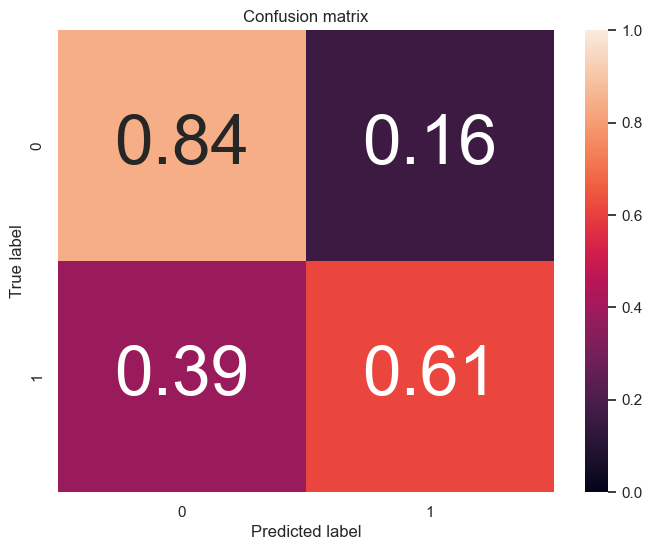

In [61]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_trainset, y_trainset)
prediction_testset = rf.predict(X=X_testset)

# Accuracy on Test
print("Training Accuracy : ", rf.score(X_trainset, y_trainset))
# Accuracy on Train
print("Testing Accuracy : ", rf.score(X_testset, y_testset))

# Confusion Matrix
cm = confusion_matrix(y_testset, prediction_testset)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

[[10093  1920]
 [ 2235  3567]]


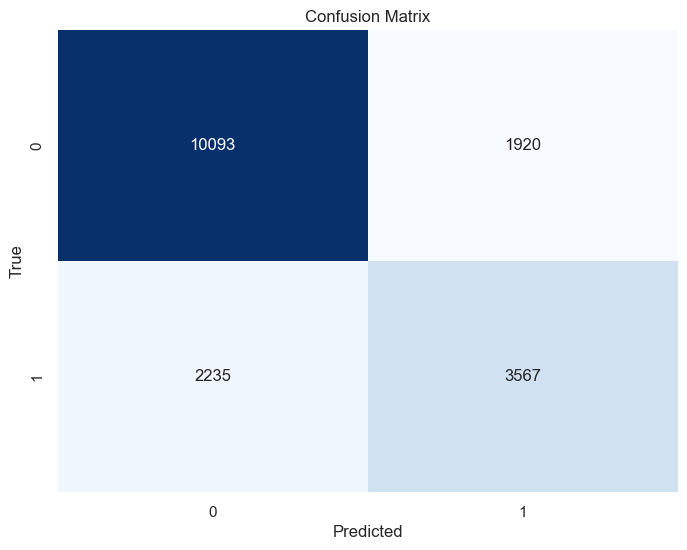

In [72]:
print(confusion_matrix(y_testset,prediction_testset))
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Đầu tiên, tính confusion matrix
# (Giả sử y_true và y_pred là nhãn thực sự và dự đoán của mô hình)
cm = confusion_matrix(y_testset, prediction_testset)

# Sử dụng seaborn để vẽ biểu đồ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


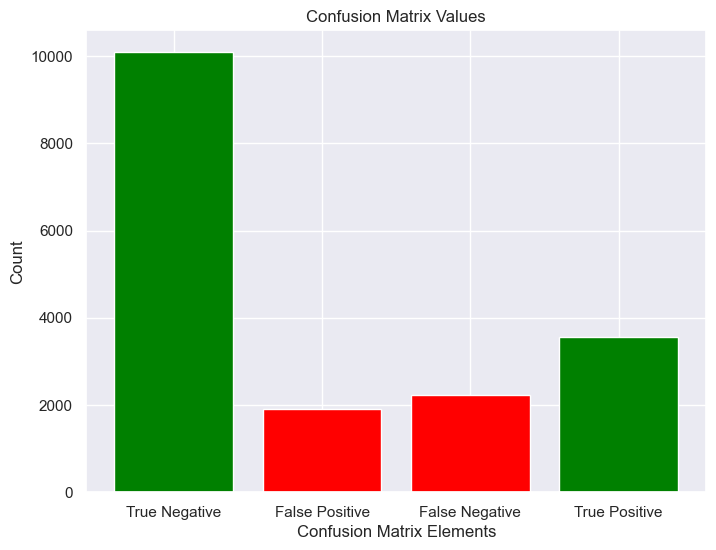

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Đầu tiên, tính confusion matrix
# (Giả sử y_true và y_pred là nhãn thực sự và dự đoán của mô hình)
cm = confusion_matrix(y_testset, prediction_testset)

# Lấy các giá trị từ confusion matrix
true_neg, false_pos, false_neg, true_pos = cm.ravel()

# Tạo mảng chứa giá trị cột
columns = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = [true_neg, false_pos, false_neg, true_pos]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(columns, values, color=['green', 'red', 'red', 'green'])

# Đặt tên cho trục và biểu đồ
plt.title('Confusion Matrix Values')
plt.xlabel('Confusion Matrix Elements')
plt.ylabel('Count')

plt.show()


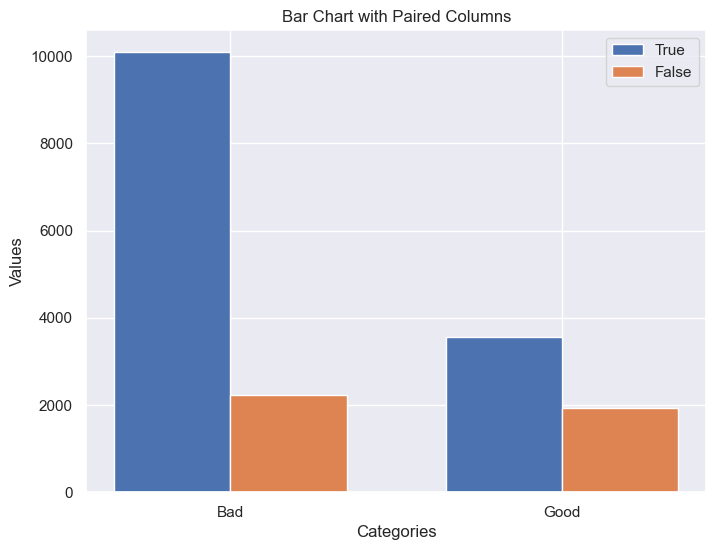

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu giả định
categories = ['Bad', 'Good']
values1 = [ 10093 ,3567] # Giá trị cho cột 1
values2 =[2235, 1920] # Giá trị cho cột 2


bar_width = 0.35  # Độ rộng của mỗi cột

# Vẽ biểu đồ cột có 2 cột dính nhau
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(np.arange(len(categories)), values1, width=bar_width, label='True')
bar2 = ax.bar(np.arange(len(categories)) + bar_width, values2, width=bar_width, label='False')

# Đặt tên và chú thích cho biểu đồ
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar Chart with Paired Columns')
ax.set_xticks(np.arange(len(categories)) + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

# Hiển thị biểu đồ
plt.show()


# Đánh giá thử mô hình

Đánh giá dựa theo Precision, recall, f1-score

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf.predict(X_testset)
accuracy = accuracy_score(y_testset, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_testset, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_testset, y_pred))


Accuracy: 0.7505472916081953
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83     12013
           1       0.68      0.45      0.54      5802

    accuracy                           0.75     17815
   macro avg       0.72      0.67      0.68     17815
weighted avg       0.74      0.75      0.73     17815

Confusion Matrix:
[[10781  1232]
 [ 3212  2590]]


# Dự đoán và tìm ngưỡng cắt phù hợp

# Mục đích khi sử dụng đường cong ROC để cắt ngưỡng
      Giảm đi những đánh giá sai về khách hàng được cho là xấu
      Tăng số lượng khách hàng đánh giá tốt
      -> Tăng thêm lợi nhuận cho công ty

In [112]:
# Dự đoán xác suất cho mỗi lớp trên tập kiểm thử
probabilities = rf.predict_proba(X_testset)


In [98]:
from sklearn.metrics import confusion_matrix

# Mô hình đã được huấn luyện và X_test, y_test là tập kiểm thử
probabilities = rf.predict_proba(X_testset)

# Chọn ngưỡng cắt dựa trên chi phí
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
best_threshold = None
min_total_cost = float('inf')

for threshold in thresholds:
    predictions = (probabilities[:, 1] > threshold).astype(int)
    cm = confusion_matrix(y_testset, predictions)
    
    # Giả sử chi phí sai lầm loại 1 là 5 và chi phí sai lầm loại 2 là 10
    cost_1 = 5 * cm[0, 1]  # Chi phí của sai lầm loại 1
    cost_2 = 10 * cm[1, 0]  # Chi phí của sai lầm loại 2
    total_cost = cost_1 + cost_2
    
    if total_cost < min_total_cost:
        min_total_cost = total_cost
        best_threshold = threshold

# Sử dụng ngưỡng cắt tốt nhất đã chọn
final_predictions = (probabilities[:, 1] > best_threshold).astype(int)

# Hiển thị kết quả và ngưỡng cắt tốt nhất
print("Best Threshold:", best_threshold)
print("Confusion Matrix with Best Threshold:")
print(confusion_matrix(y_testset, final_predictions))


Best Threshold: 0.3
Confusion Matrix with Best Threshold:
[[7825 4188]
 [ 630 5172]]


# BIểu đồ ROC


0.8467202298050489


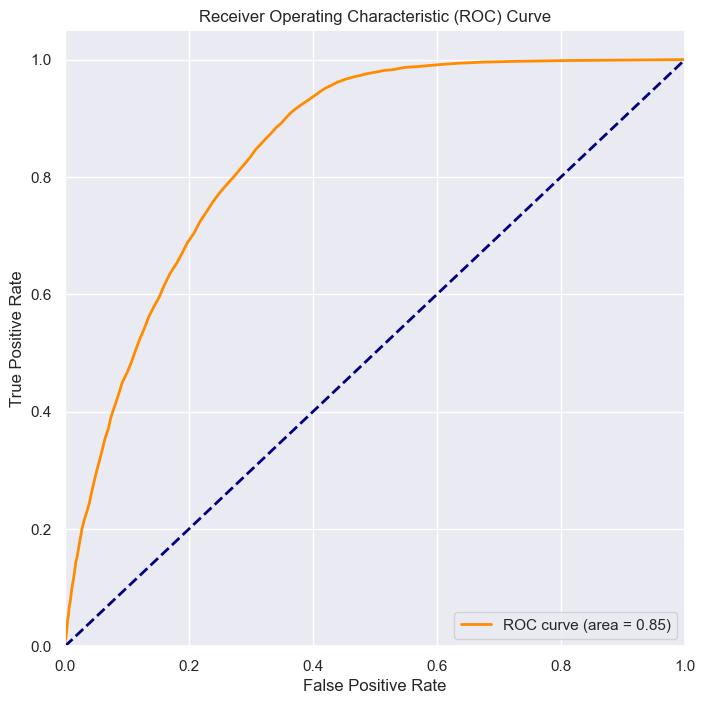

In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Xây dựng mô hình và dự đoán xác suất
# (Giả sử bạn đã có mô hình clf và X_test là tập kiểm tra)
y_prob = rf.predict_proba(X_testset)[:, 1]

# Step 2: Tìm kiếm ngưỡng tối ưu
fpr, tpr, thresholds = roc_curve(y_testset, y_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Step 3: Vẽ đường cong ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Biểu đồ sau khi cắt ngưỡng

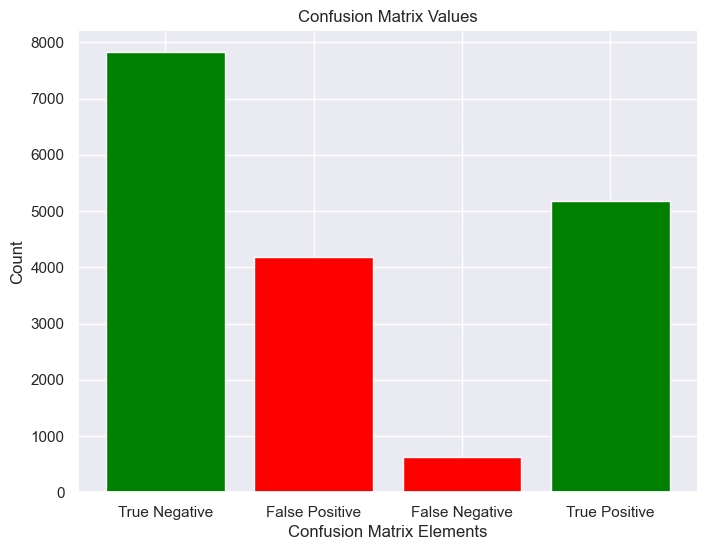

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Đầu tiên, tính confusion matrix
# (Giả sử y_true và y_pred là nhãn thực sự và dự đoán của mô hình)
cm = confusion_matrix(y_testset, final_predictions)

# Lấy các giá trị từ confusion matrix
true_neg, false_pos, false_neg, true_pos = cm.ravel()

# Tạo mảng chứa giá trị cột
columns = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = [true_neg, false_pos, false_neg, true_pos]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(columns, values, color=['green', 'red', 'red', 'green'])

# Đặt tên cho trục và biểu đồ
plt.title('Confusion Matrix Values')
plt.xlabel('Confusion Matrix Elements')
plt.ylabel('Count')

plt.show()


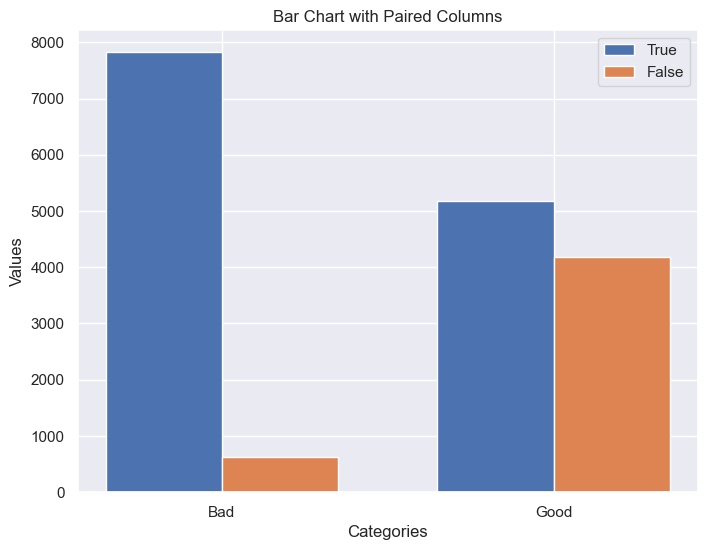

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu giả định
categories = ['Bad', 'Good']
values1 = [ 7825 ,5172] # Giá trị cho cột 1
values2 =[630, 4188] # Giá trị cho cột 2


bar_width = 0.35  # Độ rộng của mỗi cột

# Vẽ biểu đồ cột có 2 cột dính nhau
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(np.arange(len(categories)), values1, width=bar_width, label='True')
bar2 = ax.bar(np.arange(len(categories)) + bar_width, values2, width=bar_width, label='False')

# Đặt tên và chú thích cho biểu đồ
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar Chart with Paired Columns')
ax.set_xticks(np.arange(len(categories)) + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

# Hiển thị biểu đồ
plt.show()

In [49]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("\nFeature Importances:")
print(importance_df)


Feature Importances:
                Feature  Importance
6                   BMI    0.352509
5                    Wt    0.264211
20   Medical_Keyword_15    0.209825
3               Ins_Age    0.058073
16        Family_Hist_4    0.035063
4                    Ht    0.034731
15        Family_Hist_1    0.013470
9         InsuredInfo_2    0.006649
13  Insurance_History_5    0.006627
21   Medical_Keyword_35    0.003454
7     Employment_Info_1    0.003055
8     Employment_Info_6    0.002616
10        InsuredInfo_5    0.002436
12        InsuredInfo_4    0.001313
0                    Id    0.001255
17    Medical_History_7    0.000994
11        InsuredInfo_3    0.000953
19   Medical_History_38    0.000852
1        Product_Info_1    0.000852
18   Medical_History_25    0.000331
14  Insurance_History_9    0.000320
2        Product_Info_5    0.000233
22   Medical_Keyword_43    0.000179


# Biểu đồ thể hiện tầm quan trọng của các thuộc tính

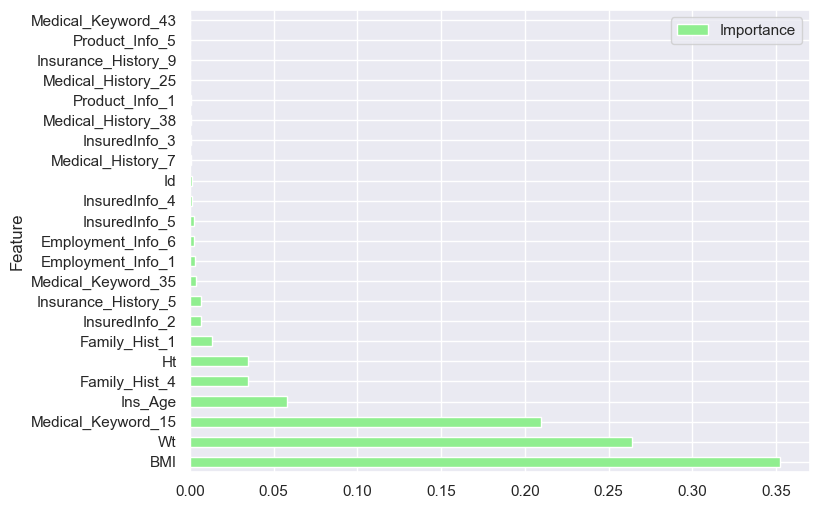

In [50]:
import matplotlib.pyplot as plt
importance_df.plot(kind="barh", x="Feature", y = "Importance", color = 'lightgreen')
plt.show()

Biểu đồ trên thể hiện trong các thuộc tính đã chọn thuộc tính nào quan trọng hơn